In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('~/Downloads/hotel_bookings.csv')
df = df[:3000]
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [56]:
df.isna().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              1
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              465
company                           2877
days_in_waiting_list     

About the missing data, because they are a categorical features, I think I just mark them with '-1' when I encode them

In [65]:
df.drop(['company', 'adr', 'reservation_status_date'], axis = 1, inplace = True)

I drop the company feature because almost all of them is null

adr is transaction per night made by the consumers, which happen after they got the room, including this feature seems unfair because we want to predict cancellation, and we won't know adr before they got the room

I also drop reservation_status_date because we already got the date feature earlier, feels redundant

In [57]:
df["arrival_date_month"] = df["arrival_date_month"].astype('category')
df.dtypes

hotel                               object
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                                object
country                             object
market_segment                      object
distribution_channel                object
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                  object
assigned_room_type                  object
booking_changes                      int64
deposit_type                        object
agent      

There's a lot of categorical feature in this data, so I think I want to encode it

In [59]:
df["arrival_date_month"] = df["arrival_date_month"].cat.codes
df["arrival_date_month"] = df["arrival_date_month"].astype('int64')

In [60]:
df['arrival_date_month'].unique()

array([1, 0, 4, 3, 2])

In [66]:
df["country"] = df["country"].astype('category')
df["country"] = df["country"].cat.codes
df["country"] = df["country"].astype('int64')
df['country'].unique()

array([40, 23, 49, 19, 26, 22, -1, 41, 36, 37,  2, 38, 16,  5,  9, 12, 24,
       28, 35, 17, 42, 46,  3, 20, 15,  7, 21, 34,  8, 30, 45,  1, 25, 11,
       33, 32, 48, 43, 31, 39, 44, 10,  4,  6, 29, 47, 50,  0, 27, 14, 51,
       13, 52, 18])

In [67]:
df["market_segment"] = df["market_segment"].astype('category')
df["market_segment"] = df["market_segment"].cat.codes
df["market_segment"] = df["market_segment"].astype('int64')
df['market_segment'].unique()

array([2, 1, 5, 4, 0, 3])

In [68]:
df["distribution_channel"] = df["distribution_channel"].astype('category')
df["distribution_channel"] = df["distribution_channel"].cat.codes
df["distribution_channel"] = df["distribution_channel"].astype('int64')
df['distribution_channel'].unique()

array([1, 0, 2])

In [69]:
df["reserved_room_type"] = df["reserved_room_type"].astype('category')
df["reserved_room_type"] = df["reserved_room_type"].cat.codes
df["reserved_room_type"] = df["reserved_room_type"].astype('int64')
df['reserved_room_type'].unique()

array([1, 0, 2, 3, 5, 4, 6, 7])

In [70]:
df["assigned_room_type"] = df["assigned_room_type"].astype('category')
df["assigned_room_type"] = df["assigned_room_type"].cat.codes
df["assigned_room_type"] = df["assigned_room_type"].astype('int64')
df['assigned_room_type'].unique()

array([2, 0, 3, 4, 6, 5, 8, 1, 7])

In [71]:
df["deposit_type"] = df["deposit_type"].astype('category')
df["deposit_type"] = df["deposit_type"].cat.codes
df["deposit_type"] = df["deposit_type"].astype('int64')
df['deposit_type'].unique()

array([0, 2, 1])

In [72]:
df["agent"] = df["agent"].astype('category')
df["agent"] = df["agent"].cat.codes
df["agent"] = df["agent"].astype('int64')
df['agent'].unique()

array([-1, 57, 40, 56,  6, 41,  4, 46, 20,  2, 33, 23, 30, 43, 42,  1, 18,
       10, 27, 59, 36, 16,  0, 22, 15, 26,  5, 34,  3, 25, 44, 28, 31, 55,
       32, 58, 11, 38, 29, 24, 51, 17,  9,  7,  8, 50, 19, 13, 35, 14, 47,
       53, 12, 45, 39, 49, 60, 21, 54, 52, 48, 37, 64, 65, 63, 62, 61])

In [73]:
df["customer_type"] = df["customer_type"].astype('category')
df["customer_type"] = df["customer_type"].cat.codes
df["customer_type"] = df["customer_type"].astype('int64')
df['customer_type'].unique()

array([2, 0, 3, 1])

In [74]:
df["reservation_status"] = df["reservation_status"].astype('category')
df["reservation_status"] = df["reservation_status"].cat.codes
df["reservation_status"] = df["reservation_status"].astype('int64')
df['reservation_status'].unique()

array([1, 0, 2])

In [80]:
df["hotel"] = df["hotel"].astype('category')
df["hotel"] = df["hotel"].cat.codes
df["hotel"] = df["hotel"].astype('int64')
df['hotel'].unique()

array([0])

There's a lot of feature in the data, initially I want to do feature selection, but let's see what happen if I use all of the features

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [97]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,0,342,2015,1,27,1,0,0,2,0.0,0,0,40,2,1,0,0,0,1,2,3,0,-1,0,2,0,0,1
1,0,0,737,2015,1,27,1,0,0,2,0.0,0,0,40,2,1,0,0,0,1,2,4,0,-1,0,2,0,0,1
2,0,0,7,2015,1,27,1,0,1,1,0.0,0,0,23,2,1,0,0,0,0,2,0,0,-1,0,2,0,0,1
3,0,0,13,2015,1,27,1,0,1,1,0.0,0,0,23,1,0,0,0,0,0,0,0,0,57,0,2,0,0,1
4,0,0,14,2015,1,27,1,0,2,2,0.0,0,0,23,5,2,0,0,0,0,0,0,0,40,0,2,0,1,1


In [81]:
x = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=False)

# EDA

Below, we could see the number of people who cancel (1) and who didn't

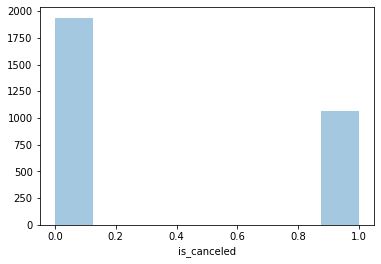

In [102]:
sns.distplot(df['is_canceled'], kde = False)

I also want to dig to some feature that I think correlate with cancellation

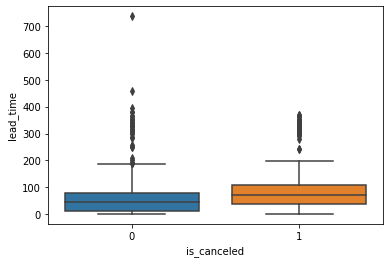

In [108]:
sns.boxplot('is_canceled', 'lead_time', data = df)

Above, we could see that the people who cancel their booking usually had bigger lead_time, even though those who didn't cancel has higher lead_time in the outlier, that represent the loyal costumer that already trust the hotel

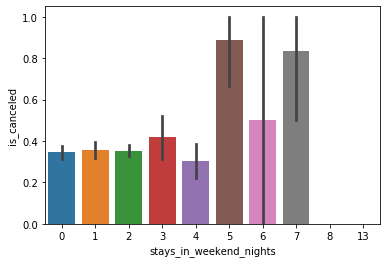

In [111]:
sns.barplot(y = 'is_canceled', x = 'stays_in_weekend_nights', data = df)

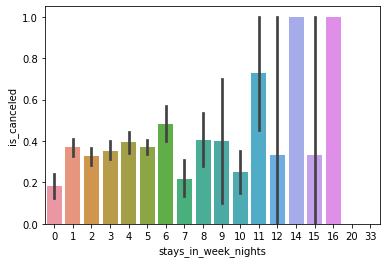

In [105]:
sns.barplot(y = 'is_canceled', x = 'stays_in_week_nights', data = df)

From above grapha, I conclude that the more the guests had stay in the hotel before, the more they are unafraid to cancel their booking

# Hypertuning and Machine Learning

in this case, I want to use Logistic Regression because it's the fastest to run, especially if I want to use Grid Search

In [88]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [90]:
from sklearn.model_selection import GridSearchCV
model_LR2 = LogisticRegression()
model_LR2_GS = GridSearchCV(model_LR2, param, cv = 5)
model_LR2_GS.fit(x_train, y_train)
model_LR2_GS.best_params_

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1302, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sk

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: Convergence

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_mo

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Con

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1311, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/muhammadramzy/

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/scipy/optimiz

{'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [118]:
model = LogisticRegression(max_iter = 10, penalty = 'l1', solver = 'liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Model Evaluation

In [119]:
confusion_matrix(y_test, y_pred)

array([[212,   0],
       [  7,  81]])

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       212
           1       1.00      0.92      0.96        88

    accuracy                           0.98       300
   macro avg       0.98      0.96      0.97       300
weighted avg       0.98      0.98      0.98       300



(2.0, 0.0)

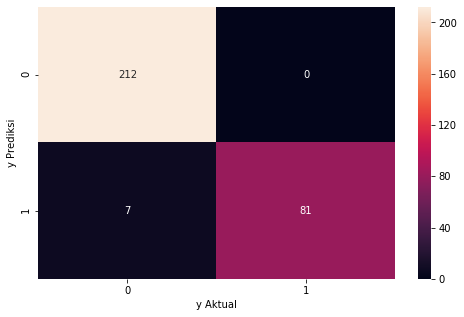

In [121]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In this case, the error that I avoid the most is the error in predicting cancellation (in this case false positive, if positive = 0 or not canceled) because that would avoid the company from spending unnecessary budget.

False negative is when it predict cancel, but actually the customer didn't cancel. In this case, it's alright, because until the customer cancel themself, they could just run its procedure as usual.

In the confusion matrix, the number of error that I want to avoid the most (false positive) is zero, and the false negative is seven.